In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import splitfolders
splitfolders.ratio("drive/MyDrive/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone", output="dataset", seed=1337, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 12446 files [05:19, 38.99 files/s] 


In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from keras.applications.vgg16 import VGG16
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras.utils import to_categorical
import os
import shutil
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
import plotly.graph_objects as go
import plotly.express as px
import datetime
from plotly.offline import init_notebook_mode, iplot
import plotly.io as pio
pio.templates.default = 'plotly_white'
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Concatenate, Flatten, MaxPooling2D, Conv2D
from  tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
channels=3
batch_size=25
test_batch_size=32
test_steps=1
train_path = './dataset/train'
test_path = './dataset/test'
val_path = './dataset/val'
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps)
def scalar(img):
    return img
trgen=ImageDataGenerator(preprocessing_function=scalar, horizontal_flip=True)
tvgen=ImageDataGenerator(preprocessing_function=scalar)
train_generator=trgen.flow_from_directory( directory=train_path , target_size=(224,224), class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)
test_generator=tvgen.flow_from_directory( directory=test_path, target_size=(224,224), class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=test_batch_size)

valid_generator=tvgen.flow_from_directory( directory=val_path, target_size=(224,224), class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)
classes=list(train_generator.class_indices.keys())
class_count=len(classes)
train_steps=int(np.ceil(len(train_generator.labels)/batch_size))

test batch size:  32   test steps:  1
Found 9955 images belonging to 4 classes.
Found 1249 images belonging to 4 classes.
Found 1242 images belonging to 4 classes.


In [ ]:
base_model = VGG16(include_top = False, weights = 'imagenet', input_shape = (224,224,3), classes = 38)


58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
# model= Sequential()
# model.add(base_model)
# model.add(Flatten())

In [ ]:
# model.summary()

In [ ]:
# model.add(Dense(1024,activation=('relu'),input_dim=512))
# model.add(Dense(512,activation=('relu')))
# model.add(Dense(256,activation=('relu')))
# model.add(Dropout(.3))
# model.add(Dense(128,activation=('relu')))
# #model.add(Dropout(.2)) ::
# model.add(Dense(4,activation=('softmax')))


# # model.summary()

model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(256,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


    tf.keras.layers.Flatten(),

    # tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax'),

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [ ]:
batch_size= 1218
epochs=15
learn_rate=.001
sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
# adam=Adam(learning_rate=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,epochs = 5
          , validation_data = valid_generator, verbose = 1)

Epoch 1/5
399/399 [==============================] - 131s 282ms/step - loss: 1.3680 - accuracy: 0.7372 - val_loss: 0.2265 - val_accuracy: 0.9267
Epoch 2/5
399/399 [==============================] - 98s 245ms/step - loss: 0.1733 - accuracy: 0.9400 - val_loss: 0.1354 - val_accuracy: 0.9549
Epoch 3/5
399/399 [==============================] - 99s 247ms/step - loss: 0.0714 - accuracy: 0.9751 - val_loss: 0.0261 - val_accuracy: 0.9919
Epoch 4/5
399/399 [==============================] - 97s 244ms/step - loss: 0.0333 - accuracy: 0.9897 - val_loss: 0.0250 - val_accuracy: 0.9936
Epoch 5/5
399/399 [==============================] - 97s 244ms/step - loss: 0.0239 - accuracy: 0.9921 - val_loss: 0.0126 - val_accuracy: 0.9960


In [ ]:
def print_info( test_gen, preds, save_dir, subject ):
    class_dict=test_gen.class_indices
    labels= test_gen.labels
    file_names= test_gen.filenames
    error_list=[]
    true_class=[]
    pred_class=[]
    prob_list=[]
    new_dict={}
    error_indices=[]
    y_pred=[]
    for key,value in class_dict.items():
        new_dict[value]=key

    classes=list(new_dict.values())
    errors=0
    for i, p in enumerate(preds):
        pred_index=np.argmax(p)
        true_index=labels[i]
        if pred_index != true_index:
            error_list.append(file_names[i])
            true_class.append(new_dict[true_index])
            pred_class.append(new_dict[pred_index])
            prob_list.append(p[pred_index])
            error_indices.append(true_index)
            errors=errors + 1
        y_pred.append(pred_index)

    y_true= np.array(labels)
    y_pred=np.array(y_pred)
    if len(classes)<= 40:

        cm = confusion_matrix(y_true, y_pred )
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    clr = classification_report(y_true, y_pred, target_names=classes)
    print("Classification Report:\n----------------------\n", clr)

In [ ]:
print(test_generator.filenames)

['Cyst/Cyst- (1).jpg', 'Cyst/Cyst- (1008).jpg', 'Cyst/Cyst- (1044).jpg', 'Cyst/Cyst- (1054).jpg', 'Cyst/Cyst- (1056).jpg', 'Cyst/Cyst- (1061).jpg', 'Cyst/Cyst- (1064).jpg', 'Cyst/Cyst- (1075).jpg', 'Cyst/Cyst- (1089).jpg', 'Cyst/Cyst- (1090).jpg', 'Cyst/Cyst- (110).jpg', 'Cyst/Cyst- (1109).jpg', 'Cyst/Cyst- (1135).jpg', 'Cyst/Cyst- (1143).jpg', 'Cyst/Cyst- (1154).jpg', 'Cyst/Cyst- (1156).jpg', 'Cyst/Cyst- (1158).jpg', 'Cyst/Cyst- (116).jpg', 'Cyst/Cyst- (1167).jpg', 'Cyst/Cyst- (1184).jpg', 'Cyst/Cyst- (1191).jpg', 'Cyst/Cyst- (1196).jpg', 'Cyst/Cyst- (1197).jpg', 'Cyst/Cyst- (1204).jpg', 'Cyst/Cyst- (1215).jpg', 'Cyst/Cyst- (1216).jpg', 'Cyst/Cyst- (1239).jpg', 'Cyst/Cyst- (1244).jpg', 'Cyst/Cyst- (1246).jpg', 'Cyst/Cyst- (1248).jpg', 'Cyst/Cyst- (1250).jpg', 'Cyst/Cyst- (1264).jpg', 'Cyst/Cyst- (1270).jpg', 'Cyst/Cyst- (1287).jpg', 'Cyst/Cyst- (1288).jpg', 'Cyst/Cyst- (1295).jpg', 'Cyst/Cyst- (1298).jpg', 'Cyst/Cyst- (1314).jpg', 'Cyst/Cyst- (1376).jpg', 'Cyst/Cyst- (1378).jpg', 'Cys

40/40 [==============================] - 17s 390ms/step


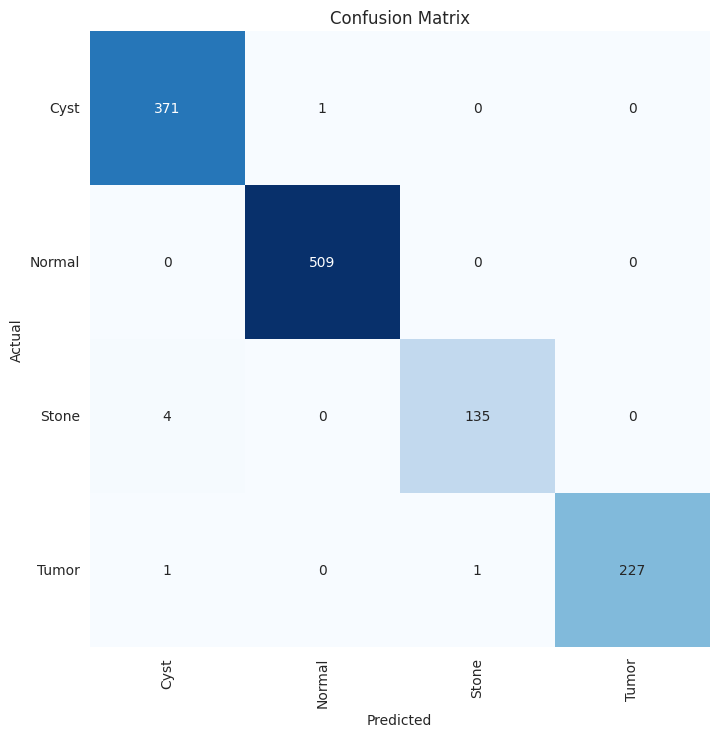

Classification Report:
----------------------
               precision    recall  f1-score   support

        Cyst       0.99      1.00      0.99       372
      Normal       1.00      1.00      1.00       509
       Stone       0.99      0.97      0.98       139
       Tumor       1.00      0.99      1.00       229

    accuracy                           0.99      1249
   macro avg       0.99      0.99      0.99      1249
weighted avg       0.99      0.99      0.99      1249



In [ ]:
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
p = model.predict(test_generator)
print_info( test_generator, p, r'./', 'kidney')

In [ ]:
model.evaluate(test_generator)

40/40 [==============================] - 10s 262ms/step - loss: 0.0236 - accuracy: 0.9944


[0.023612815886735916, 0.9943954944610596]

In [ ]:

test_generator.reset()
pred=model.predict_generator(test_generator,verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(results)
    # dislabels. Item
# display(results.to_string())


<ipython-input-17-077b187723e0>:2: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



40/40 [==============================] - 9s 237ms/step
                       Filename Predictions
0            Cyst/Cyst- (1).jpg        Cyst
1         Cyst/Cyst- (1008).jpg        Cyst
2         Cyst/Cyst- (1044).jpg        Cyst
3         Cyst/Cyst- (1054).jpg        Cyst
4         Cyst/Cyst- (1056).jpg        Cyst
5         Cyst/Cyst- (1061).jpg        Cyst
6         Cyst/Cyst- (1064).jpg        Cyst
7         Cyst/Cyst- (1075).jpg        Cyst
8         Cyst/Cyst- (1089).jpg        Cyst
9         Cyst/Cyst- (1090).jpg        Cyst
10         Cyst/Cyst- (110).jpg        Cyst
11        Cyst/Cyst- (1109).jpg        Cyst
12        Cyst/Cyst- (1135).jpg        Cyst
13        Cyst/Cyst- (1143).jpg        Cyst
14        Cyst/Cyst- (1154).jpg        Cyst
15        Cyst/Cyst- (1156).jpg        Cyst
16        Cyst/Cyst- (1158).jpg        Cyst
17         Cyst/Cyst- (116).jpg        Cyst
18        Cyst/Cyst- (1167).jpg        Cyst
19        Cyst/Cyst- (1184).jpg        Cyst
20        Cyst/Cyst- 

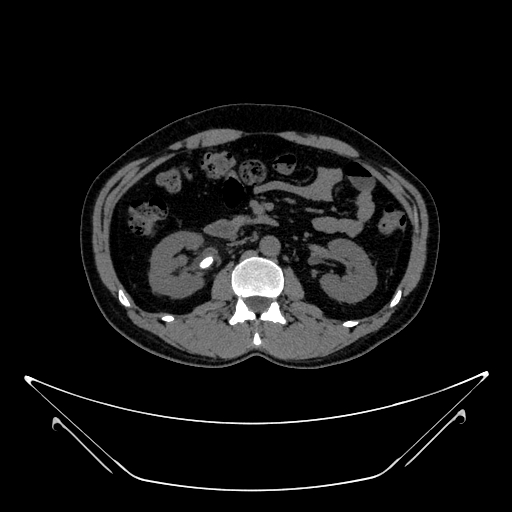

In [ ]:
from PIL import Image
im = Image.open('drive/MyDrive/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone/Stone- (1).jpg')
display(im)

In [ ]:
import os
from PIL import Image

In [ ]:
def p(d):
  q = 'drive/MyDrive/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/'
  full_path = os.path.join(q,filenames[d])
  im = Image.open(full_path)

  display(im)
  print(results.loc[[d]])


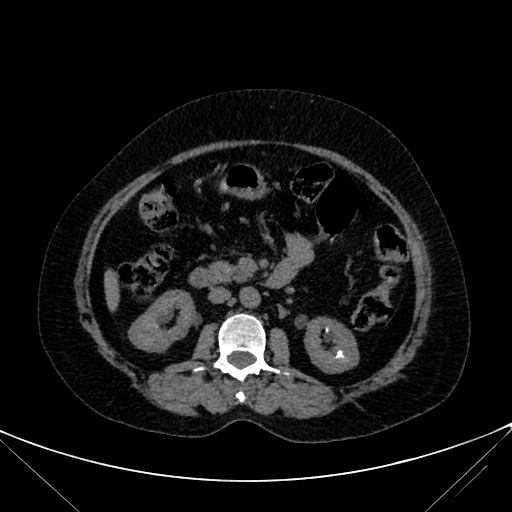

                   Filename Predictions
950  Stone/Stone- (431).jpg       Stone


In [ ]:
p(950)

In [ ]:
test_generator[0]

(array([[[[  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.]],
 
         [[  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.]],
 
         [[  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.]],
 
         ...,
 
         [[  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.]],
 
         [[  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.